<a href="https://colab.research.google.com/github/AngeloBongiorno/delete_me/blob/main/custom_datasets_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import pytorch and setup device agnostic code

In [ ]:
import torch
from torch import nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# otteniamo i dati
il dataset è un subset di food101, ma con solo 3 classi di cibo e il 10% delle immagini (75 immagini di training, 25 di testing)

Di solito conviene sperimentare con dataset piccoli, per velocizzare lo sviluppo

In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
  print("Dir already exists")
else:
  print("Creating dir...")
  image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi_20_percent.zip")
  print(f"Downloading data...")
  f.write(request.content)

# unzip
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)

Creating dir...


In [ ]:
image_path

PosixPath('data/pizza_steak_sushi')

# guardare i dati

In [ ]:
import os

def walk_through_dir(dir_path):
  """Walks through dir_path returning its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dir_path}")

walk_through_dir(image_path)

There are 2 directories and 0 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi
There are 0 directories and 150 images in data/pizza_steak_sushi
There are 0 directories and 146 images in data/pizza_steak_sushi
There are 0 directories and 154 images in data/pizza_steak_sushi
There are 3 directories and 0 images in data/pizza_steak_sushi
There are 0 directories and 46 images in data/pizza_steak_sushi
There are 0 directories and 58 images in data/pizza_steak_sushi
There are 0 directories and 46 images in data/pizza_steak_sushi


## Visualizzare immagini

data/pizza_steak_sushi/train/sushi/1070104.jpg
sushi
Random image path: data/pizza_steak_sushi/train/sushi/1070104.jpg
image class: sushi
Image width: 512
Image height: 384


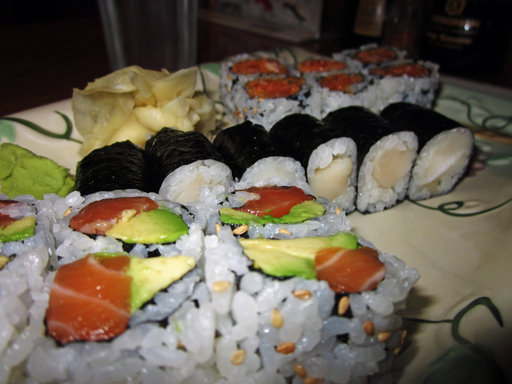

In [ ]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

# get image class
image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"Image width: {img.width}")
print(f"Image height: {img.height}")
img

(-0.5, 511.5, 383.5, -0.5)

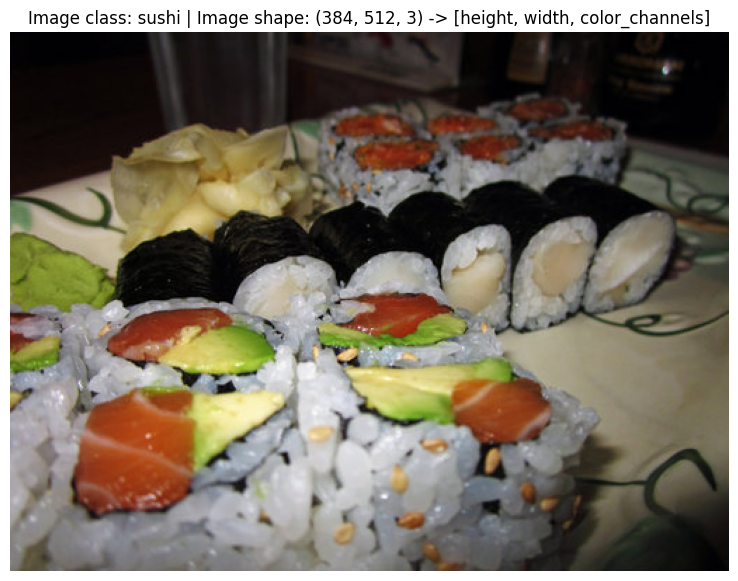

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

# Trasformare i dati
1. devo trasformare i dati in tensori
2. devo trasformarli in `torch.utils.data.Dataset`

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# scriviamo una transform

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [ ]:
data_transform(img)

tensor([[[0.0078, 0.0039, 0.0039,  ..., 0.0039, 0.0078, 0.0157],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0078, 0.0118],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0078, 0.0118],
         ...,
         [0.0431, 0.0275, 0.0275,  ..., 0.3569, 0.4431, 0.5255],
         [0.0314, 0.0118, 0.0275,  ..., 0.3373, 0.4000, 0.4902],
         [0.0157, 0.0118, 0.0275,  ..., 0.3412, 0.3725, 0.4627]],

        [[0.0078, 0.0039, 0.0039,  ..., 0.0039, 0.0078, 0.0078],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0078, 0.0078],
         [0.0039, 0.0039, 0.0039,  ..., 0.0039, 0.0078, 0.0078],
         ...,
         [0.0392, 0.0235, 0.0275,  ..., 0.3294, 0.4196, 0.5176],
         [0.0275, 0.0118, 0.0275,  ..., 0.3098, 0.3765, 0.4824],
         [0.0157, 0.0078, 0.0275,  ..., 0.3216, 0.3529, 0.4471]],

        [[0.0157, 0.0118, 0.0118,  ..., 0.0118, 0.0157, 0.0157],
         [0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.0118],
         [0.0118, 0.0118, 0.0118,  ..., 0.0118, 0.0118, 0.

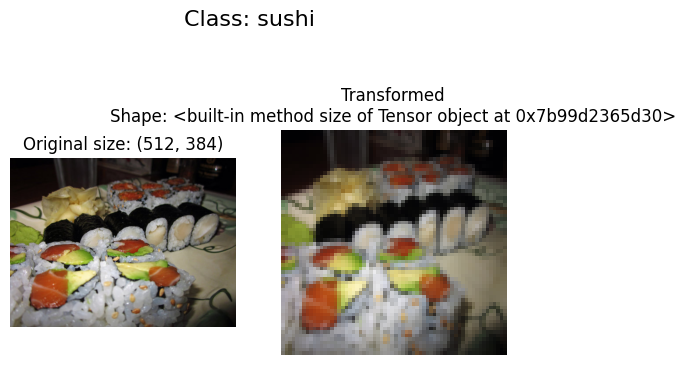

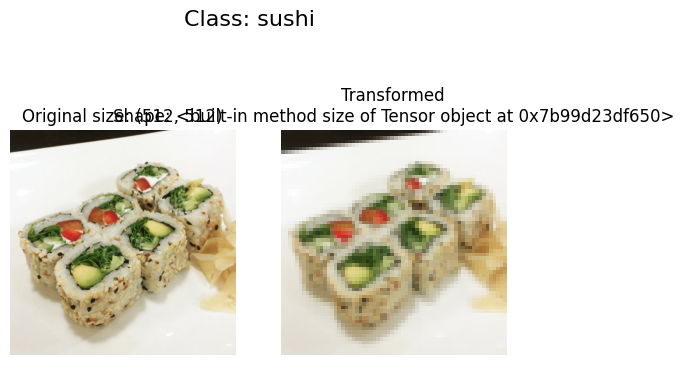

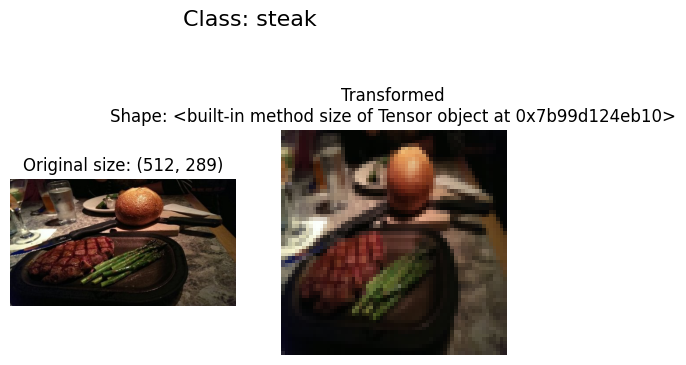

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
  """Seleziona immagini random e le carica/trasforma"""
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)
  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(nrows=1, ncols=2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original size: {f.size}")
      ax[0].axis(False)

      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed\nShape: {transformed_image.size}")
      ax[1].axis("off")

      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transform,
                        n=3,
                        seed=42)

## Opzione 1: usare `ImageFolder` di Pytorch

In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None) # è la trasformazione per la label, non ci serve in questo caso

test_data = datasets.ImageFolder(root=test_dir,
                                  transform=data_transform,
                                  target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [ ]:
# get class names as list
class_names = train_data.classes
class_dict = train_data.class_to_idx
class_names, class_dict, train_data.samples[0]

(['pizza', 'steak', 'sushi'],
 {'pizza': 0, 'steak': 1, 'sushi': 2},
 ('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0))

## Creiamo i dataloader
servono a iterare sui dati
questa procedura si fa su tutti i tipi di dati, non solo immagini

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE=1

train_dataloader = DataLoader(batch_size=BATCH_SIZE,
                              dataset=train_data,
                              num_workers=1,
                              shuffle=True)
test_dataloader = DataLoader(batch_size=BATCH_SIZE,
                              dataset=test_data,
                              num_workers=1,
                              shuffle=False)

In [ ]:
img, label = next(iter(train_dataloader))

print(f"Img shape: {img.shape}, label shape: {label.shape}")

Img shape: torch.Size([1, 3, 64, 64]), label shape: torch.Size([1])


# Opzione 2: caricare dati con un custom `Dataset`
Non usiamo `ImageFolder`

In [ ]:
import os
import pathlib

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple, Dict, List

In [ ]:
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [ ]:
target_directory = train_dir
print(f"Target dir: {target_directory}")

class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_names_found

Target dir: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [ ]:
def find_classes(directory: str) -> Tuple[List[str], Dict[str, int]]:
  classes = sorted([entry.name for entry in list(os.scandir(directory))])
  if not classes:
    raise FileNotFoundError("Please check file structure")
  classes_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, classes_to_idx

In [ ]:
find_classes(target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

## Creiamo `Dataset` custom

In [ ]:
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
  def __init__(self, target_dir: str, transform=None):
    self.paths = list(pathlib.Path(target_dir).glob("*/*.jpg"))
    self.transforms = transform
    self.classes, self.class_to_idx = find_classes(target_dir)

  def load_image(self, index: int) -> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)

  def __len__(self) -> int:
    return len(self.paths)

  def __getitem__(self, index: int) -> Tuple[torch.Tensor, int]:
    img = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]

    if self.transforms:
      return self.transforms(img), class_idx
    else:
      return img, class_idx

In [ ]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
])

In [ ]:
train_data_custom = ImageFolderCustom(target_dir=train_dir,
                                      transform=train_transforms)

test_data_custom = ImageFolderCustom(target_dir=test_dir,
                                      transform=test_transforms)

In [ ]:
len(train_data), len(train_data_custom)

(450, 450)

In [ ]:
len(test_data), len(test_data_custom)

(150, 150)

In [ ]:
def display_random_images(dataset: torch.utils.data.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool= True,
                          seed: int = None):
  if n > 10:
    n = 10
    display_shape = False

  if seed:
    random.seed(seed)

  random_samples_idx = random.sample(range(len(dataset)), k=n)

  plt.figure(figsize=(16, 8))

  for index, targ_sample in enumerate(random_samples_idx):
    targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

    targ_image_adjust = targ_image.permute(1, 2, 0)

    plt.subplot(1, n, index+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class: {classes[targ_label]}"
      if display_shape:
        title += f"\nshape: {targ_image_adjust.shape}"
    plt.title(title)

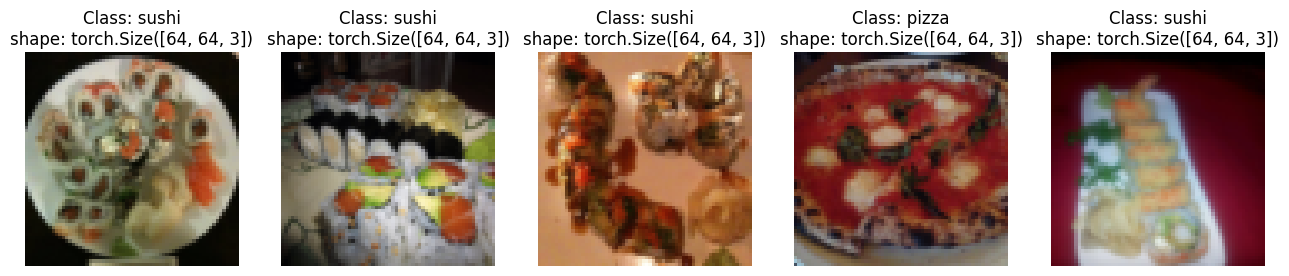

In [ ]:
display_random_images(dataset=train_data_custom,
                      n=5,
                      classes=class_names,
                      seed=None)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
custom_dataloader_train = DataLoader(dataset=train_data_custom,
                               batch_size=BATCH_SIZE,
                               num_workers=NUM_WORKERS,
                               shuffle=True)
custom_dataloader_test = DataLoader(dataset=test_data_custom,
                               batch_size=BATCH_SIZE,
                               num_workers=NUM_WORKERS,
                               shuffle=False)

custom_dataloader_test, custom_dataloader_train

(<torch.utils.data.dataloader.DataLoader at 0x7b99d2373150>,
 <torch.utils.data.dataloader.DataLoader at 0x7b99d1292090>)

# Data augmentation

In [ ]:
from torchvision import transforms

train_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

In [ ]:
image_path_list = list(image_path.glob("*/*/é.jpg"))
image_path_list[:10]

[]

In [ ]:
"""
plot_transformed_images(image_paths=image_path_list,
                        transform=train_transform,
                        n=3,
                        seed=None)
"""

# model 0 - no data augmentation

simple_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

from torchvision import datasets

train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)


test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

import os
from torch.utils.data import DataLoader

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(dataset=train_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=True)

test_dataloader_simple = DataLoader(dataset=test_data_simple,
                                     batch_size=BATCH_SIZE,
                                     num_workers=NUM_WORKERS,
                                     shuffle=False)


In [ ]:
from torch import nn

class TinyVGG(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int) -> None:
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*16*16,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

In [ ]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [ ]:
image_batch, label_batch = next(iter(train_dataloader_simple))
model_0(image_batch.to(device))

tensor([[0.0649, 0.0630, 0.0391],
        [0.0636, 0.0605, 0.0360],
        [0.0606, 0.0593, 0.0380],
        [0.0636, 0.0603, 0.0367],
        [0.0610, 0.0599, 0.0372],
        [0.0636, 0.0641, 0.0386],
        [0.0637, 0.0614, 0.0419],
        [0.0666, 0.0663, 0.0388],
        [0.0674, 0.0664, 0.0396],
        [0.0642, 0.0620, 0.0386],
        [0.0611, 0.0662, 0.0360],
        [0.0679, 0.0646, 0.0430],
        [0.0633, 0.0595, 0.0373],
        [0.0678, 0.0621, 0.0349],
        [0.0605, 0.0600, 0.0374],
        [0.0694, 0.0657, 0.0420],
        [0.0682, 0.0646, 0.0400],
        [0.0678, 0.0677, 0.0403],
        [0.0624, 0.0591, 0.0388],
        [0.0603, 0.0590, 0.0373],
        [0.0629, 0.0633, 0.0411],
        [0.0661, 0.0639, 0.0410],
        [0.0677, 0.0618, 0.0422],
        [0.0605, 0.0604, 0.0399],
        [0.0616, 0.0613, 0.0405],
        [0.0660, 0.0590, 0.0398],
        [0.0536, 0.0627, 0.0372],
        [0.0631, 0.0572, 0.0366],
        [0.0693, 0.0675, 0.0413],
        [0.068

In [ ]:
try:
  import torchinfo
except:
  !pip install torchinfo
  import torchinfo

from torchinfo import summary

summary(model=model_0,
        input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer:torch.optim.Optimizer,
               device=device):
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to the target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X) # output model logits

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate accuracy metric
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class==y).sum().item()/len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc = 0,  0

  # Turn on inference mode
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to the target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate the loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate the accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [ ]:


from tqdm.auto import tqdm

# 1. Create a train function that takes in various model parameters + optimizer + dataloaders + loss function
def train(model: torch.nn.Module,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5,
          device=device):

  # 2. Create empty results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # 3. Loop through training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer,
                                       device=device)
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn,
                                    device=device)

    # 4. Print out what's happening
    print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

    # 5. Update results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # 6. Return the filled results at the end of the epochs
  return results

In [ ]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model_0 = TinyVGG(input_shape=3, # number of color channels of our target images
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.1074 | Train acc: 0.3604 | Test loss: 1.0975 | Test acc: 0.3625
Epoch: 1 | Train loss: 1.1013 | Train acc: 0.3229 | Test loss: 1.1002 | Test acc: 0.3875
Epoch: 2 | Train loss: 1.0988 | Train acc: 0.3375 | Test loss: 1.0962 | Test acc: 0.3625
Epoch: 3 | Train loss: 1.0967 | Train acc: 0.3750 | Test loss: 1.0902 | Test acc: 0.4619
Epoch: 4 | Train loss: 1.0832 | Train acc: 0.4792 | Test loss: 1.0613 | Test acc: 0.4886
Total training time: 5.808 seconds


In [ ]:
def plot_loss_curves(results: Dict[str, List[float]]):
  loss = results["train_loss"]
  test_loss = results["test_loss"]
  acc = results["train_acc"]
  test_acc = results["test_acc"]

  epochs = range(len(results["train_loss"]))

  plt.figure(figsize=(15, 7))

  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="Train loss")
  plt.plot(epochs, test_loss, label="Test loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.subplot(1, 2, 1)
  plt.plot(epochs, acc, label="Train acc")
  plt.plot(epochs, test_acc, label="Test acc")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()

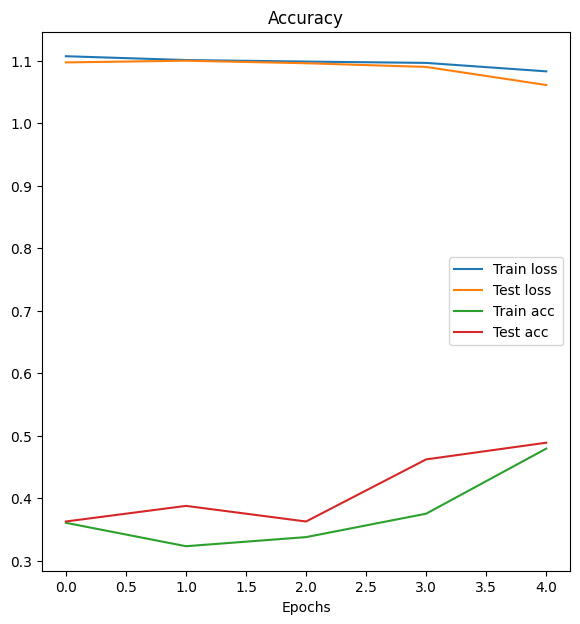

In [ ]:
plot_loss_curves(model_0_results)

# Data augmentation

In [ ]:
from torchvision import transforms

train_transform_trivial = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform_simple = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [ ]:
try:
  from torchvision import datasets
except:
  !pip install torchvision
  from torchvision import datasets

train_data_augmented = datasets.ImageFolder(root=train_dir,
                                            transform=train_transform_trivial)

test_data_simple = datasets.ImageFolder(root=test_dir,
                                            transform=test_transform_simple)

In [ ]:
import os
from torch.utils.data import DataLoader

torch.manual_seed(42)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augmented = DataLoader(
    dataset=train_data_augmented,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=True
)

train_dataloader_simple = DataLoader(
    dataset=test_data_simple,
    batch_size=BATCH_SIZE,
    num_workers=NUM_WORKERS,
    shuffle=False
)

In [ ]:
model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data_augmented.classes)).to(device)

In [ ]:
torch.manual_seed(42)
from timeit import default_timer as timer

loss_fn = torch.nn.CrossEntropyLoss()
optimize = torch.optim.Adam(params=model_1.parameters(),
                            lr=0.001)

NUM_EPOCHS = 5

start = timer()

results = train(model=model_1,
      train_dataloader=train_dataloader_augmented,
      test_dataloader=train_dataloader_simple,
      optimizer=optimizer,
      loss_fn=loss_fn,
      epochs=NUM_EPOCHS)

end = timer()

print(f"Total training time: {end-start:.3f} seconds")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 1.0981 | Train acc: 0.3458 | Test loss: 1.0993 | Test acc: 0.2938
Epoch: 1 | Train loss: 1.0983 | Train acc: 0.2854 | Test loss: 1.0993 | Test acc: 0.2938
Epoch: 2 | Train loss: 1.0992 | Train acc: 0.2792 | Test loss: 1.0993 | Test acc: 0.2938
Epoch: 3 | Train loss: 1.0984 | Train acc: 0.2667 | Test loss: 1.0993 | Test acc: 0.2938
Epoch: 4 | Train loss: 1.0989 | Train acc: 0.3021 | Test loss: 1.0993 | Test acc: 0.2938
Total training time: 5.078 seconds


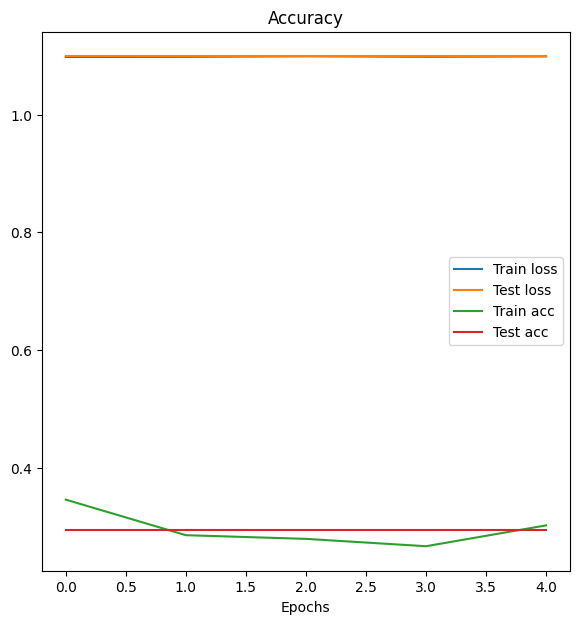

In [ ]:
plot_loss_curves(results=results)

In [ ]:
custom_image_path = "/content/baita.jpg"

In [ ]:
import torchvision

custom_image_uint8 = torchvision.io.read_image(str(custom_image_path))
#plt.imshow(custom_image_uint8.permute(1, 2, 0))

print(f"Custom image tensor:\n {custom_image_uint8}")
print(f"Custom image tensor shape:\n {custom_image_uint8.shape}")
print(f"Custom image tensor datatype:\n {custom_image_uint8.dtype}")

Custom image tensor:
 tensor([[[ 13,  12,  11,  ..., 147, 147, 147],
         [ 13,  12,  11,  ..., 151, 150, 150],
         [ 16,  15,  14,  ..., 151, 151, 150],
         ...,
         [200, 200, 200,  ..., 157, 152, 133],
         [203, 198, 205,  ..., 119, 156, 162],
         [206, 201, 207,  ...,  93, 120, 137]],

        [[  9,   8,   7,  ...,  99,  98,  98],
         [  9,   8,   7,  ..., 103, 102, 102],
         [ 11,  10,   9,  ..., 104, 103, 102],
         ...,
         [193, 193, 193,  ..., 136, 131, 112],
         [198, 193, 200,  ...,  98, 135, 141],
         [201, 196, 202,  ...,  72, 100, 117]],

        [[  6,   5,   6,  ...,  61,  65,  65],
         [  6,   5,   6,  ...,  65,  66,  66],
         [  8,   7,   6,  ...,  62,  63,  64],
         ...,
         [200, 200, 200,  ..., 119, 114,  95],
         [205, 200, 207,  ...,  79, 114, 120],
         [208, 203, 209,  ...,  51,  76,  93]]], dtype=torch.uint8)
Custom image tensor shape:
 torch.Size([3, 506, 900])
Custom imag

torch.Size([3, 506, 900])
torch.Size([3, 64, 64])


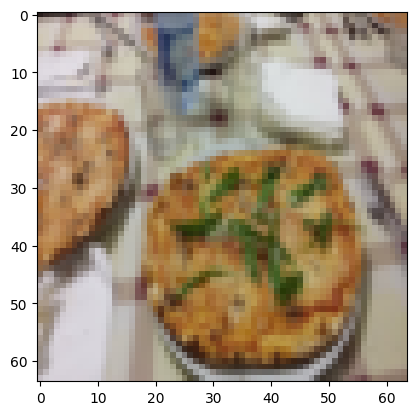

In [ ]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(64, 64))
])

custom_image_transformed = custom_image_transform(custom_image)

print(custom_image.shape)
print(custom_image_transformed.shape)
plt.imshow(custom_image_transformed.permute(1, 2, 0).to("cpu"))

In [ ]:
custom_image = custom_image_uint8.type(torch.float32).to(device) / 255

model_1.eval()
with torch.inference_mode():
  custom_image_preds = model_1(custom_image_transformed.unsqueeze(0))

custom_image_preds


tensor([[0.0678, 0.0649, 0.0385]], device='cuda:0')

In [ ]:
custom_image_pred_probs = torch.softmax(custom_image_preds, dim=1)
custom_image_pred_probs

tensor([[0.3369, 0.3359, 0.3272]], device='cuda:0')

In [ ]:
custom_image_pred_labels = torch.argmax(custom_image_pred_probs, dim=1)
custom_image_pred_labels

tensor([0], device='cuda:0')

In [ ]:
class_names[custom_image_pred_labels]

'pizza'

In [ ]:
# funzionalizzare tutto

def pred_and_plot(model: torch.nn.Module,
            image_path: str,
            class_names: List[str] = None,
            transform=None,
            device=device):

  custom_image_uint8 = torchvision.io.read_image(str(image_path))
  custom_image = custom_image_uint8.type(torch.float32).to(device) / 255

  if transform:
    custom_image = transform(custom_image)

  model.to(device)

  model.eval()
  with torch.inference_mode():
    custom_image = custom_image_transformed.unsqueeze(0)

    custom_image_preds = model(custom_image.to(device))

  custom_image_probs = torch.softmax(custom_image_preds, dim=1)

  custom_image_label = torch.argmax(custom_image_probs, dim=1)

  plt.imshow(custom_image.squeeze().permute(1, 2, 0).cpu())
  if class_names:
    title = f"Pred: {class_names[custom_image_label.cpu()]} | Prob: {custom_image_probs.max().cpu():.3f}"
  else:
    title = f"Pred: {custom_image_label.cpu() | Prob: {custom_image_probs.max().cpu():.3f}}"

  plt.title(title)
  plt.axis(False)



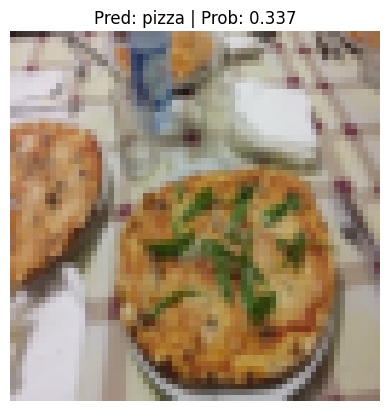

In [ ]:
pred_and_plot(model=model_1,
                    image_path=custom_image_path,
                    class_names=class_names,
                    device=device,
                    transform=custom_image_transform)